In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [2]:
def analyzer(max_depth):
    data=pd.read_csv(r"C:\Users\Lenovo\Downloads\Social_Network_Ads (1).csv")
    X=data.iloc[:,2:4].values
    y=data.iloc[:,-1].values

    clf=DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)

    a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.1)
    b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=100)

    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(input_array)

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)

    plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Social_Network_Ads (1).csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,100000,Male,56,26442,0
1,100001,Male,46,61289,1
2,100002,Male,32,68747,0
3,100003,Male,60,52327,0
4,100004,Male,25,87827,0
...,...,...,...,...,...
3995,103995,Male,24,47328,0
3996,103996,Male,31,104506,1
3997,103997,Female,20,89408,0
3998,103998,Male,33,138852,1


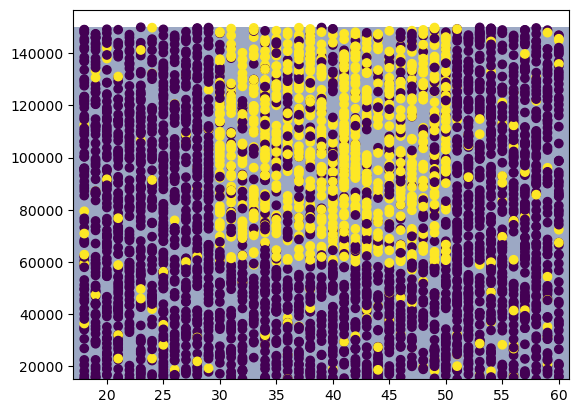

In [4]:
analyzer(1)

### Decision Tree Regressor 

In [6]:
import pandas as pd 
# from pandas_datareader import data
import numpy as np 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [7]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()
df['species']=lb.fit_transform(df[['species']])

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(max))

clf=DecisionTreeRegressor(criterion='friedman_mse',max_depth=5,splitter='random')

In [13]:
max=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    max.append(r2_score(y_test,y_pred))


In [14]:
np.argmax(max)

35

In [15]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
r2_score(y_test,y_pred)

0.8880597014925373

In [16]:
param_grid={
    'max_depth':[2,4,6,8,10,None],
    'criterion':['poisson','squared_error','friedman_mse','absolute_error'],
    'max_features':[0.25,0.5,0.75,1.0],
    'min_samples_split':[0.25,0.5,0.75,1.0],
    'splitter':['best','random']
}

In [17]:
reg=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'friedman_mse', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_split': [0.25, 0.5, 0.75, 1.0],
                         'splitter': ['best', 'random']})

In [18]:
reg.best_score_

0.9580298060899846

In [19]:
for importance,name in sorted(zip(clf.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

petal_width 0.9624784358826913
petal_length 0.028929092758879966
sepal_length 0.008592471358428761
sepal_width 0.0


### visualization of decision tree 

In [21]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
import graphviz.backend as be
import dtreeviz

In [58]:
from sklearn.datasets import * 
from dtreeviz.trees import model
from IPython.display import Image,display_svg,SVG

In [24]:
clas=tree.DecisionTreeClassifier(max_depth=2)
iris=load_iris()

X_train=iris.data
y_train=iris.target
clas.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

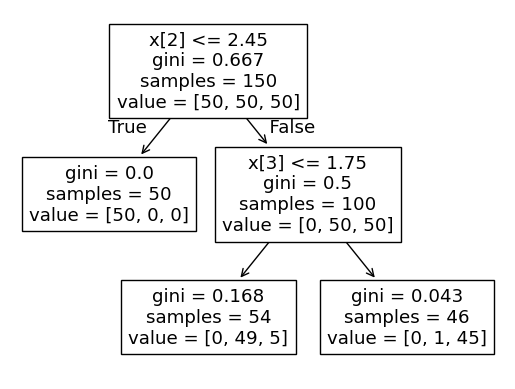

In [25]:
from sklearn.tree import plot_tree 
plot_tree(clas)

### 1) classification

In [60]:
viz=model(clas,
            X_train,
            y_train,
            target_name='price',
            feature_names=iris.feature_names,
            class_names=['stosa','versicolor','virginica'])

viz.view(scale=1.5)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH